    # Project 2-Richardson

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [3]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [4]:
#Read in data from source 
df_raw = pd.read_csv("/Users/squirrel/Documents/project02/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [5]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [6]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Values in the GRE variable have are more widely spread.

#### Question 4. Drop data points with missing data


In [7]:
df_raw.dropna(how='any', inplace=True)

In [14]:
df_raw.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Counts dropped from the first count() method, and counts are uniform across all 4 variables.

#### Question 6. Create box plots for GRE and GPA

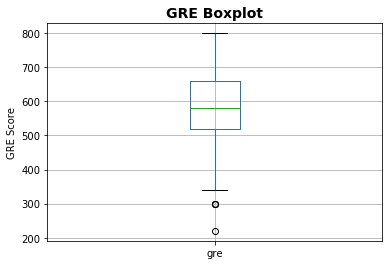

In [50]:
bp01 = df_raw.boxplot(column='gre', grid=True)
bp01.set_ylabel("GRE Score")
bp01.set_title('GRE Boxplot', fontsize=14, fontweight='bold')

#### Question 7a. What do this plots show?

Answer: The **GRE scores** range from ~325 to 800, with outliers below (fall outside the IQRx1.5). The median is shy of 600, and 50% of the results fall roughly between 650 and 510.

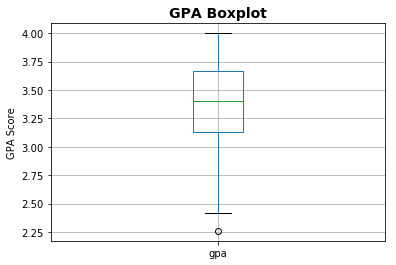

In [52]:
bp02 = df_raw.boxplot(column='gpa', grid=True)
bp02.set_ylabel("GPA Score")
bp02.set_title('GPA Boxplot', fontsize=14, fontweight='bold')

#### Question 7b. What do this plots show?

Answer: The **GPA scores** scores range from just under 2.5 to 4.0, with one outliers below at 2.25 (falls outside the IQRx1.5). The median is shy of 3.5, and 50% of the results fall roughly between 3.2 and 3.7.

#### Question 8. Describe each distribution 

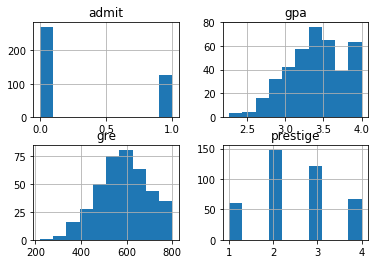

In [53]:
  df_raw.hist()
  pl.show()


#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [56]:
df_raw.std() #check if std dev approximates range over 4

admit         0.466044
gre         115.717787
gpa           0.380208
prestige      0.947083
dtype: float64

**GRE** (800-220)/4 = 145, 30 point difference  
**GPA** =(4-2.26)/4 = .435, .55 pont difference

Answer:  
a) **Admit** is not normally distributed as it's a dichotomous variable.  
b) **Prestige (Rank)** is not normally distributed because it has too few levels.    
b) **GPA** is not normally distributed given point difference (above) and it has a bi-modal distribution.  
c) **GRE** is not norally distributed given point difference (above) and it is negatively skewed.  

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer:   
a) **GPA** and **GRE** need correction.  
b) Not correcting the distributions threatens the validity of each model.  
c) Correct using multivariate regression, assuming variables are not colinear **(???)**


#### Question 11. Which of our variables are potentially colinear? 

See below...

In [66]:
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


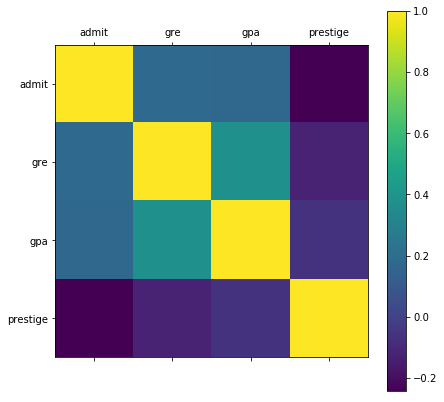

In [10]:
# visualize correlation matrix using a heatmap
#change the font size and figure size if you have problem reading the labels
plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams['font.size'] = 10


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df_raw.corr())
fig.colorbar(cax)
ax.set_xticks(range(len(df_raw.corr().index)))
ax.set_yticks(range(len(df_raw.corr().index)))
ax.set_xticklabels(df_raw.corr().index)
ax.set_yticklabels(df_raw.corr().index)

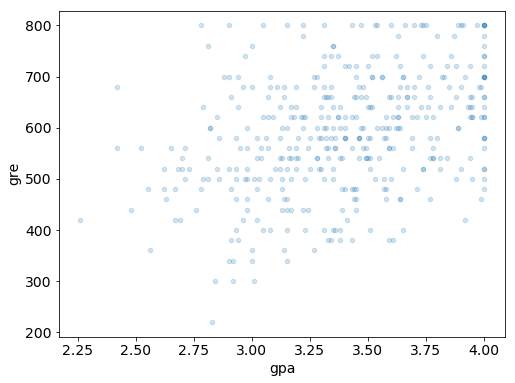

In [69]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
df_raw.plot(kind='scatter', x='gpa', y='gre', alpha=0.2)

In [75]:
# create x and y
feature_cols = ['gpa']
x = df_raw[feature_cols]
y = df_raw['gre']
linreg = LinearRegression()
linreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
print(linreg.intercept_)
print(linreg.coef_)

193.044936743
[ 116.38734118]


In [77]:
linreg.intercept_ + linreg.coef_*3.5

array([ 600.40063087])

In [78]:
linreg.predict(3.5)

array([ 600.40063087])

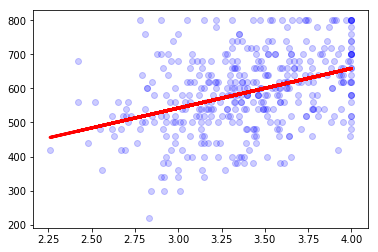

In [79]:
plt.scatter(x, y,  color='blue',alpha=.2)
plt.plot(x, linreg.predict(x), color='red',linewidth=3)

#### Question 12. What did you find?

Answer:  
a) **GRE** and **GPA** have a **strong positive** correlation and are **colinear**  
a) **GRE** and **GPA** have a **moderate positive** correlation with each another and are **somewhat likely to be colinear**  
b) **GRE** and **GPA** both have **weak positive** correlations with **Admit**  and are **unlikely to be colinear**  
c) **GRE** and **GPA** both have **strong negative** correlations with **Prestige (Rank)**  and are **likely to be colinear**

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer:  

Research Question:  

What if any association is there between grad school admissions rates and prestige of undergraduate schools?

Data Analysis

To examine the research question, I will conduct a logistic regression to model the probability that the prestige of undergraduate schools predicts grad school admissions rates.

#### Question 14. What is your hypothesis? 

Answer:  
Ho: There **IS NO ASSOCIATION** between grad school admissions rates and prestige of undergraduate schools.  

Ha: There **IS AN ASSOCIATION** between grad school admissions rates and prestige of undergraduate schools.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [ ]:
Answer: Add dummy variables

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data

In [ ]:
Answer: Could use a KNN method to impute values